In [23]:
#import des librairies

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Chargement du dataset  MNIST 

mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
print('Train: X=%s, y=%s' % (X_train_full.shape, y_train_full.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Label =  5


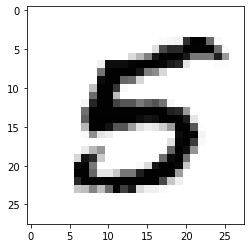

In [8]:
# visualisation du dataset

def visualise_sample(image_index=0): 
    image_index = image_index # You may select anything up to 60,000
    print("Label = ", y_train_full[image_index])
    plt.imshow(X_train_full[image_index], cmap='Greys')
    
visualise_sample(20000)

In [38]:
# Mise à l'échelle des caractéristiques. utile pour la descente de gradien
# Création d'un set de validation

def prepare_data(X_train_full, y_train_full):
    X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
    y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
    return X_valid, X_train, y_valid, y_train

X_valid, X_train, y_valid, y_train = prepare_data(X_train_full, y_train_full)
#visualise_sample(20000)

In [20]:
# Construction et compilation du modèle à partir des hyperparamètres

def build_model(n_hidden=1, n_neurons=100, learning_rate=3e-3, input_shape=[28, 28]):
    model = keras.models.Sequential()   
    model.add(keras.layers.InputLayer(input_shape=input_shape)) 
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):        
        model.add(keras.layers.Dense(n_neurons, activation="relu"))    
    model.add(keras.layers.Dense(10, activation="softmax"))    
    optimizer = keras.optimizers.SGD(lr=learning_rate)    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])    
    return model

In [31]:
# Entrainement du reseau

model = build_model(n_hidden=2, n_neurons=100) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 1.2869 - accuracy: 0.6722 - val_loss: 0.6283 - val_accuracy: 0.8484
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5115 - accuracy: 0.8652 - val_loss: 0.4093 - val_accuracy: 0.8930
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3929 - accuracy: 0.8906 - val_loss: 0.3437 - val_accuracy: 0.9082
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3457 - accuracy: 0.9024 - val_loss: 0.3125 - val_accuracy: 0.9124
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3176 - accuracy: 0.9092 - val_loss: 0.2882 - val_accuracy: 0.9204
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2973 - accuracy: 0.9156 - val_loss: 0.2723 - val_accuracy: 0.9238
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2808 - accuracy: 0.9192 - val_loss: 0.2566 - val_accurac

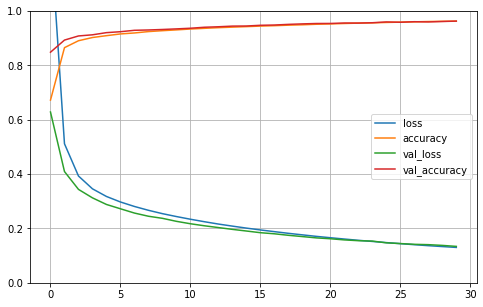

In [32]:
def show_graphics():
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # Régler la plage verticale sur [0-1]
    plt.show()
    
show_graphics()

In [37]:
#Ici on évalue la cpacité de généralisation du modèle

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 19.2013 - accuracy: 0.9575


[19.201250076293945, 0.9574999809265137]

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Sauvegarde du modele
#model.save("mnist_model_neurons_2_100.h5")